Assignment_1

1. Write a program to execute the Euler and Verlet algorithms for a mass on a spring, plot the trajectories of the dynamical veriables as functions of time.

2. Investigate the numerical solution for various different values of the time step dt. Compare performance of the alorithms over several thousand oscillations.

3. Find the critical value of dt for the verlet case above which it becomes unstable.


Euler integration technique:

\begin{equation}
v(t + \Delta t) = v(t) + \Delta t \frac{dv}{dt} + \mathcal{O}(\Delta t ^ {2})
\end{equation}

\begin{equation}
x(t + \Delta t) = x(t) + \Delta t v(t) + \mathcal{O}(\Delta t ^ {2})
\end{equation}

Verlet integration technique:

\begin{equation}
x(t + \Delta t) = 2x(t) - x(t - \Delta t) - \Delta t^{2} \frac{d^{2}x}{dx^{2}} + \mathcal{O}(\Delta t ^ {4})
\end{equation}

Central difference technique for velocity:

\begin{equation}
v(t+\Delta t) = \frac{1}{2\Delta t} [x(t + \Delta t) - x(t - \Delta t)] + \mathcal{O}(\Delta t ^ {2})
\end{equation}

In the case of a mass on a spring:
\begin{equation}
\frac{d^{2}x}{dx^{2}} = - \frac{kx}{m}
\end{equation}

Functions used to test the numerical methods.

Find the maxima

Find the period

Plot the error to the analytical solution

In [1]:
from logging import raiseExceptions
import numpy as np
import matplotlib.pyplot as plt

def maxima_search(x):
    
    maxima = []
    k = 0
    for i in range(len(x)-1):
        if x[i+1] > x[i]:
            k = 1 # k is set to one if the next item is larger than the last
        else: # this will trigger if the next item is smaller than the last
            if k == 1: # if the next item is smaller than the last and the last item is larger than the one before (k is set)
                maxima.append([x[i],i]) #maxima is recorded
                k = 0
            else:
                k = 0 #k is set to zero if the next item is smaller than the last
    return maxima


def find_period(maxima,dt):
    
    peak_times = [maxima[i][1]*dt for i in range(len(maxima))] # create a list containing the times at which peaks occur

    if len(peak_times) > 1:
        total = 0 
        for i in range(len(peak_times)-1):
            total += peak_times[i+1] - peak_times[i] # this sum is uded to calcuate the average time difference between peaks

    else:
        raise ValueError('Not enough peaks are captured to measure the period of oscillation') # if only one peak is measured period is not assessed

    return total/(len(peak_times)-1) , peak_times # return the average time difference between peaks


def error_plot(xa,xn,scale):
    return (xa-xn)*scale

Motion of mass on a spring solved given intial conditions using analytical methods.

C:\Users\jacob\AppData\Local\Temp\ipykernel_22096\231090512.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w*time - np.arctan(v0/(w*x0)))


The number of time intervals used: 25000
The period of oscillation is: 7.024814731040727


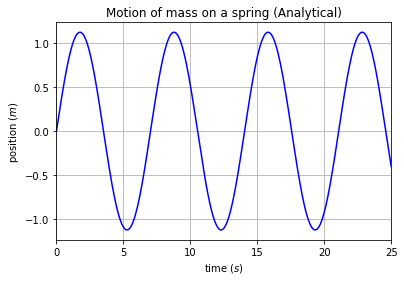

In [2]:
M = 5
K = 4
x0 = 0
v0 = 1
dt = 0.001
tf = 25

def analyitcal_solve(M,K,x0,v0,dt,tf):
    time = np.arange(0,tf,dt)
    w = np.sqrt(K/M)
    x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w*time - np.arctan(v0/(w*x0)))
    return time,x,w

time,x,w = analyitcal_solve(M,K,x0,v0,dt,tf)

print('The number of time intervals used: ' + str(len(time)))
print('The period of oscillation is: '+ str((2*np.pi)/w))

plt.plot(time,x,color='blue')
plt.title('Motion of mass on a spring (Analytical)')
plt.xlabel('time $(s)$')
plt.ylabel('position $(m)$')
plt.grid()
plt.xlim(0,tf)
plt.show()

Motion of mass on a spring solved numerically given intial conditions using Euler integration.

The number of time intervals used: 25000
The period of oscillation is: 7.024666666666666


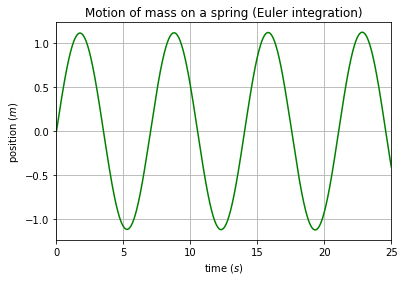

In [3]:

def euler_solve(M,K,x0,v0,dt,tf): 
    
    time = np.arange(0,tf,dt)

    x = np.zeros(len(time))
    x[0] = x0

    v = np.zeros(len(time))
    v[0] = v0

    for i in range(len(time)-1):
        v[i+1] = v[i] - (dt*K*x[i])/M
        
        x[i+1] = x[i] + (dt*v[i])
    
    return time,x,v

time,x,v = euler_solve(M,K,x0,v0,dt,tf)

maxima = maxima_search(x)

period,peak_times = find_period(maxima,dt)

print('The number of time intervals used: ' + str(len(time)))
print('The period of oscillation is: '+ str(period))

plt.plot(time,x,color='green')
plt.title('Motion of mass on a spring (Euler integration)')
plt.xlabel('time $(s)$')
plt.ylabel('position $(m)$')
plt.grid()
plt.xlim(0,tf)
plt.show()

Motion of mass on a spring solved using verlet integration


The number of time intervals used: 25000
The period of oscillation is: 7.0249999999999995


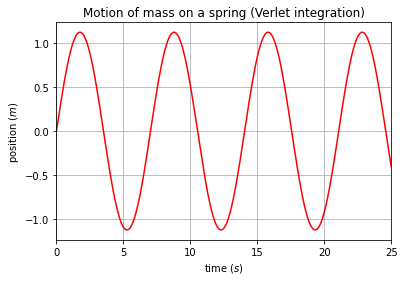

In [4]:
def verlet_solve(M,K,x0,v0,dt,tf):
    
    time = np.arange(0,tf,dt)
    
    x = np.zeros(len(time))
    x[0] = x0

    v = np.zeros(len(time))
    v[0] = v0

    x[1] = x[0] + dt*v[0]
    
    for i in range(1, len(time)-1):
        x[i+1] = 2*x[i] - x[i-1] - (dt**2)*K*x[i]/M
        v[i] = (x[i+1]-x[i-1])/(dt**2)
    
    v[-1] = v[-2] - (dt*K*x[-2])/M

    return time,x,v

time,x,v = verlet_solve(M,K,x0,v0,dt,tf)

maxima = maxima_search(x)

period,peak_times = find_period(maxima,dt)

print('The number of time intervals used: ' + str(len(time)))
print('The period of oscillation is: '+ str(period))


plt.plot(time,x,color='red')
plt.title('Motion of mass on a spring (Verlet integration)')
plt.xlabel('time $(s)$')
plt.ylabel('position $(m)$')
plt.grid()
plt.xlim(0,tf)
plt.show()

Comparing Euler and Verlet solutions to the analytical solution

1.7320508075688772


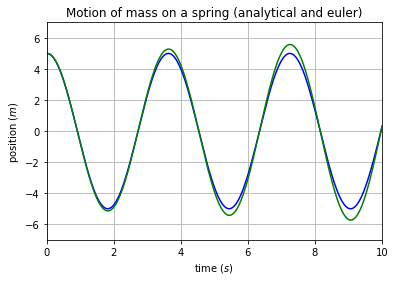

In [5]:
M = 1
K = 3
x0 = 5
v0 = 0
dt = 0.01
tf = 300

time_a, x_a, w_a = analyitcal_solve(M,K,x0,v0,dt,tf)
time_e, x_e, v_e = euler_solve(M,K,x0,v0,dt,tf)
print(w_a)
plt.plot(time_a,x_a,color='blue')
plt.plot(time_a,x_e,color='green')
plt.title('Motion of mass on a spring (analytical and euler)')
plt.xlabel('time $(s)$')
plt.ylabel('position $(m)$')
plt.grid()
plt.xlim(0,10)
plt.ylim(-7,7)
plt.show()

1.7320508075688772


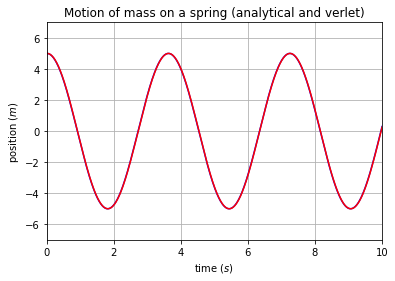

In [6]:
time_v, x_v, v_v = verlet_solve(M,K,x0,v0,dt,tf)
print(w_a)
plt.plot(time_a,x_a,color='blue')
plt.plot(time_a,x_v,color='red')
plt.title('Motion of mass on a spring (analytical and verlet)')
plt.xlabel('time $(s)$')
plt.ylabel('position $(m)$')
plt.grid()
plt.xlim(0,10)
plt.ylim(-7,7)
plt.show()

Assesing the stability using the positional error over time for several thousand oscillations

C:\Users\jacob\AppData\Local\Temp\ipykernel_22096\231090512.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w*time - np.arctan(v0/(w*x0)))


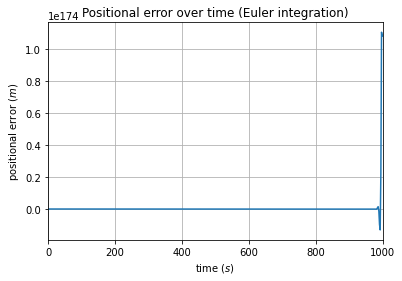

In [7]:
M = 1
K = 1
x0 = 0
v0 = 1
dt = 2
tf = 1000

time_a, x_a, w_a = analyitcal_solve(M,K,x0,v0,dt,tf)
time_e, x_e, v_e = euler_solve(M,K,x0,v0,dt,tf)

error = error_plot(x_a,x_e,1)
plt.plot(time_a,error )
plt.title('Positional error over time (Euler integration)')
plt.xlabel('time $(s)$')
plt.ylabel('positional error $(m)$')
plt.grid()
plt.xlim(0,tf)
plt.show()

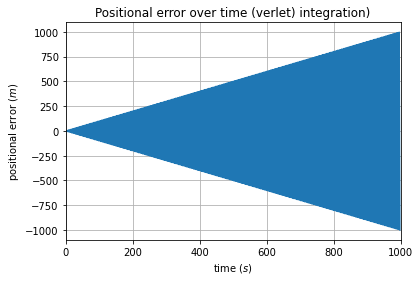

In [8]:
time_v, x_v, v_v = verlet_solve(M,K,x0,v0,dt,tf)
error = error_plot(x_a,x_v,1)
plt.plot(time_a,error )
plt.title('Positional error over time (verlet) integration)')
plt.xlabel('time $(s)$')
plt.ylabel('positional error $(m)$')
plt.grid()
plt.xlim(0,tf)
plt.show()

C:\Users\jacob\AppData\Local\Temp\ipykernel_22096\1756497008.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w_a*tf - np.arctan(v0/(w*x0)))


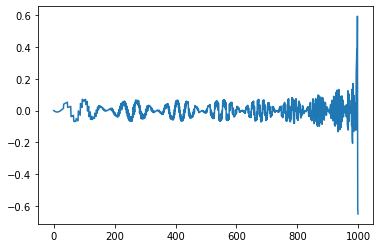

In [8]:
stable = []
x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w_a*tf - np.arctan(v0/(w*x0)))
for i in range(1000,2000,1):
    x_v = verlet_solve(M,K,x0,v0,i/1000,tf)[1][-30:]
    stable.append(np.average(x_v))
plt.plot(stable)

Assesment of the speeds of calculation using a fixed scenario. 

Mass = 8 kg

Spring constant = 4 N/m

Inital position = 0

Inital velocity = 1

Time interval = 0.001

Time from 0 to 40 seconds

In [9]:
print('Euler solution: ')
%timeit euler_solve(5,4,0,1,0.001,40)
print('Verlet solution: ')
%timeit verlet_solve(5,4,0,1,0.001,40)
print('Analytical solution: ')
%timeit analyitcal_solve(5,4,0,1,0.001,40)

Euler solution: 
27.2 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Verlet solution: 
49.1 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Analytical solution: 


C:\Users\jacob\AppData\Local\Temp\ipykernel_22096\231090512.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.sqrt(x0**2+(v0/w)**2)*np.cos(w*time - np.arctan(v0/(w*x0)))


267 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


[[4, 3], [7, 12]]
2.5
2
[3, 2, 1]
[4, 3, 2, 1]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


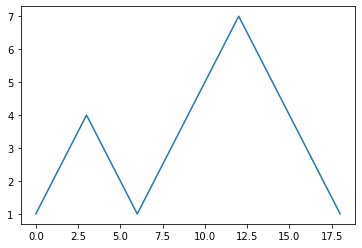

In [11]:
ls = [1,2,3,4,3,2,1,2,3,4,5,6,7,6,5,4,3,2,1]

maxima = []

k = 0
for i in range(len(ls)-1):
    if ls[i+1] > ls[i]:
        k = 1
    else:
        if k == 1:
            maxima.append([ls[i],i])
            k = 0
        else:
            k = 0

print(maxima)

plt.plot(ls)
plt.show

print(np.average([1,2,3,4]))

def nums():
    return 1,2,3

num = nums()[1]
print(num)

print(ls[-3:])
print(ls[-4:])

print(np.zeros((10,3)))